In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.envs.unity_gym_env import UnityToGymWrapper
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class UnityToGymWrapperIgnorePixels(UnityToGymWrapper):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        assert len(self._observation_space) == 2
        self._observation_space = self._observation_space[1]

    def _single_step(self, *args, **kwargs):
        obs, reward, done, info = super()._single_step(*args, **kwargs)
        assert isinstance(obs, list) and (len(obs) == 2)
        # ignore pixels (obs[0])
        return (obs[1], reward, done, info)

In [3]:
# Location of the Unity binary
FILENAME = "/Users/anayebi/Zebrafish/swimmer3_zebrafish_build_macosx.app"

# Build env and convert to Gym env
unity_env = UnityEnvironment(file_name=FILENAME, seed=1)
# env = UnityToGymWrapperIgnorePixels(unity_env, allow_multiple_obs=True)
env = UnityToGymWrapper(unity_env, allow_multiple_obs=True)

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

/Users/anayebi/Library/Python/3.9/lib/python/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [4]:
env.observation_space

Box(-inf, inf, (27,), float32)

In [5]:
env.observation_space.shape

(27,)

In [6]:
env.action_space

Box(-1.0, 1.0, (2,), float32)

In [7]:
env.action_space.shape

(2,)

In [4]:
# Start interacting with the environment
obs = env.reset()
for i in range(2):
    action = env.action_space.sample()
    # action = np.array([0, 0, 1, 0])
    # action = brain(obs)
    obs, reward, done, info = env.step(action)
    print(i)
    if reward > 0:
        print(obs, reward, done, info)
    if done:
        obs = env.reset()
        
decision_steps, terminal_steps = env._env.get_steps(env.name)

0
[array([[[0.49803922, 0.627451  , 0.827451  ],
        [0.49803922, 0.627451  , 0.827451  ],
        [0.49803922, 0.627451  , 0.827451  ],
        ...,
        [0.4627451 , 0.5803922 , 0.7647059 ],
        [0.4627451 , 0.5803922 , 0.7647059 ],
        [0.4627451 , 0.5803922 , 0.7647059 ]],

       [[0.5019608 , 0.6313726 , 0.83137256],
        [0.5019608 , 0.6313726 , 0.83137256],
        [0.5019608 , 0.6313726 , 0.83137256],
        ...,
        [0.46666667, 0.58431375, 0.76862746],
        [0.4627451 , 0.58431375, 0.76862746],
        [0.4627451 , 0.58431375, 0.76862746]],

       [[0.5058824 , 0.63529414, 0.8352941 ],
        [0.5058824 , 0.63529414, 0.8352941 ],
        [0.5058824 , 0.63529414, 0.8352941 ],
        ...,
        [0.46666667, 0.5882353 , 0.77254903],
        [0.46666667, 0.5882353 , 0.77254903],
        [0.46666667, 0.5882353 , 0.77254903]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        

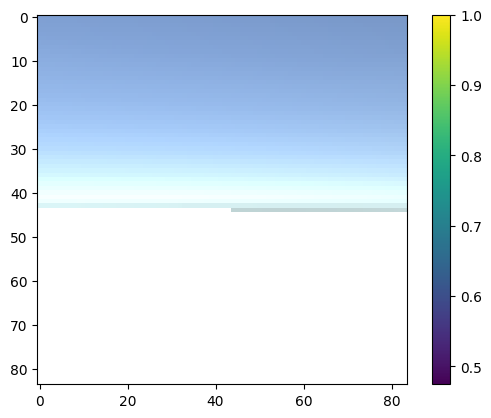

In [5]:
plt.imshow(obs[0])
plt.colorbar()

In [5]:
# Start interacting with the environment
obs = env.reset()
for i in range(1000):
    action = env.action_space.sample()
    # action = np.array([0, 0, 1, 0])
    # action = brain(obs)
    obs, reward, done, info = env.step(action)
    print(i)
    if reward > 0:
        print(obs[0].shape, reward, done, info)
    if done:
        obs = env.reset()

0
(84, 84, 3) 1.5388575 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67c700>}
1
(84, 84, 3) 1.5236962 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a4ec7c0>}
2
(84, 84, 3) 1.5117359 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67caf0>}
3
(84, 84, 3) 1.5290221 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67c730>}
4
(84, 84, 3) 1.5952281 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67cb50>}
5
(84, 84, 3) 1.6352451 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67c550>}
6
(84, 84, 3) 1.6496404 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67c400>}
7
(84, 84, 3) 1.6463785 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67caf0>}
8
(84, 84, 3) 1.6268438 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a67c790>}
9
(84, 84, 3) 1.6129538 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11

82
(84, 84, 3) 1.6450765 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2fe80>}
83
(84, 84, 3) 1.6450928 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2fe20>}
84
(84, 84, 3) 1.6475363 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2f7c0>}
85
(84, 84, 3) 1.6467245 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2feb0>}
86
(84, 84, 3) 1.6460592 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2ff70>}
87
(84, 84, 3) 1.644873 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2fa00>}
88
(84, 84, 3) 1.642523 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a8dd280>}
89
(84, 84, 3) 1.643821 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2fd00>}
90
(84, 84, 3) 1.6465397 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa2fc70>}
91
(84, 84, 3) 1.6484652 False {'step': <mlagents_envs.base_env.DecisionSteps object 

164
(84, 84, 3) 1.6414698 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7de50>}
165
(84, 84, 3) 1.6417334 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7deb0>}
166
(84, 84, 3) 1.6448374 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7dc40>}
167
(84, 84, 3) 1.6479748 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7df40>}
168
(84, 84, 3) 1.6467135 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7df70>}
169
(84, 84, 3) 1.6433835 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7db20>}
170
(84, 84, 3) 1.6444354 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7dfa0>}
171
(84, 84, 3) 1.6442347 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7deb0>}
172
(84, 84, 3) 1.6438327 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7dbe0>}
173
(84, 84, 3) 1.6475128 False {'step': <mlagents_envs.base_env.Decision

244
(84, 84, 3) 1.642148 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7ee20>}
245
(84, 84, 3) 1.6472927 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7ee80>}
246
(84, 84, 3) 1.65158 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7eeb0>}
247
(84, 84, 3) 1.6491847 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7eee0>}
248
(84, 84, 3) 1.6410772 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7ef10>}
249
(84, 84, 3) 1.6366389 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7ef70>}
250
(84, 84, 3) 1.6363285 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7eeb0>}
251
(84, 84, 3) 1.6383961 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7efa0>}
252
(84, 84, 3) 1.6453454 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7ef40>}
253
(84, 84, 3) 1.6498786 False {'step': <mlagents_envs.base_env.DecisionSte

324
(84, 84, 3) 1.646112 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fd30>}
325
(84, 84, 3) 1.6475146 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fd60>}
326
(84, 84, 3) 1.6435413 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fbe0>}
327
(84, 84, 3) 1.6412485 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fdc0>}
328
(84, 84, 3) 1.642057 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fdf0>}
329
(84, 84, 3) 1.6405888 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fb50>}
330
(84, 84, 3) 1.6438012 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fe50>}
331
(84, 84, 3) 1.6489902 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fe80>}
332
(84, 84, 3) 1.6459895 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa7fbe0>}
333
(84, 84, 3) 1.6410332 False {'step': <mlagents_envs.base_env.DecisionSt

404
(84, 84, 3) 1.6556933 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88c40>}
405
(84, 84, 3) 1.65435 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88ca0>}
406
(84, 84, 3) 1.6533155 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88d60>}
407
(84, 84, 3) 1.6553398 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88cd0>}
408
(84, 84, 3) 1.656718 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88d30>}
409
(84, 84, 3) 1.6560844 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88df0>}
410
(84, 84, 3) 1.6564821 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88d60>}
411
(84, 84, 3) 1.6551712 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88e20>}
412
(84, 84, 3) 1.6544588 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa88df0>}
413
(84, 84, 3) 1.6568189 False {'step': <mlagents_envs.base_env.DecisionSte

486
(84, 84, 3) 1.6672742 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ac40>}
487
(84, 84, 3) 1.670388 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ac70>}
488
(84, 84, 3) 1.6712061 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8aca0>}
489
(84, 84, 3) 1.6659002 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8acd0>}
490
(84, 84, 3) 1.6597294 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ad30>}
491
(84, 84, 3) 1.661866 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8aca0>}
492
(84, 84, 3) 1.6644293 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ad60>}
493
(84, 84, 3) 1.6645721 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8adc0>}
494
(84, 84, 3) 1.667057 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ae20>}
495
(84, 84, 3) 1.6682416 False {'step': <mlagents_envs.base_env.DecisionSte

567
(84, 84, 3) 1.661138 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8db80>}
568
(84, 84, 3) 1.657918 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dbe0>}
569
(84, 84, 3) 1.6552277 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dca0>}
570
(84, 84, 3) 1.6561794 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dc10>}
571
(84, 84, 3) 1.6639497 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dc40>}
572
(84, 84, 3) 1.6697913 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dd00>}
573
(84, 84, 3) 1.6664928 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dcd0>}
574
(84, 84, 3) 1.6596282 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dc70>}
575
(84, 84, 3) 1.6554613 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8dd30>}
576
(84, 84, 3) 1.6549145 False {'step': <mlagents_envs.base_env.DecisionSt

649
(84, 84, 3) 1.6632376 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ebe0>}
650
(84, 84, 3) 1.6632844 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ebb0>}
651
(84, 84, 3) 1.6602166 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8e940>}
652
(84, 84, 3) 1.6582826 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ec40>}
653
(84, 84, 3) 1.6547471 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8eca0>}
654
(84, 84, 3) 1.6516968 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ec70>}
655
(84, 84, 3) 1.6572537 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ed00>}
656
(84, 84, 3) 1.663284 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ecd0>}
657
(84, 84, 3) 1.6618363 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa8ed30>}
658
(84, 84, 3) 1.6600696 False {'step': <mlagents_envs.base_env.DecisionS

729
(84, 84, 3) 1.6735842 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86a90>}
730
(84, 84, 3) 1.6695955 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86b50>}
731
(84, 84, 3) 1.6624794 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86820>}
732
(84, 84, 3) 1.6588343 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86b80>}
733
(84, 84, 3) 1.660413 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86be0>}
734
(84, 84, 3) 1.6656458 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11a810d00>}
735
(84, 84, 3) 1.6704129 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86040>}
736
(84, 84, 3) 1.6704432 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86c70>}
737
(84, 84, 3) 1.6659236 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa86820>}
738
(84, 84, 3) 1.6648743 False {'step': <mlagents_envs.base_env.DecisionS

811
(84, 84, 3) 1.6727688 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91a90>}
812
(84, 84, 3) 1.6743503 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91af0>}
813
(84, 84, 3) 1.6737344 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91b50>}
814
(84, 84, 3) 1.6755586 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91a30>}
815
(84, 84, 3) 1.6757133 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91b20>}
816
(84, 84, 3) 1.6722424 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91be0>}
817
(84, 84, 3) 1.6710986 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91c10>}
818
(84, 84, 3) 1.6740273 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91b20>}
819
(84, 84, 3) 1.6763252 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa91bb0>}
820
(84, 84, 3) 1.6767597 False {'step': <mlagents_envs.base_env.Decision

891
(84, 84, 3) 1.6678634 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa92a00>}
892
(84, 84, 3) 1.6652325 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa929d0>}
893
(84, 84, 3) 1.6632144 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa92a30>}
894
(84, 84, 3) 1.6674861 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa92a90>}
895
(84, 84, 3) 1.6715977 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa92b20>}
896
(84, 84, 3) 1.669849 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa929a0>}
897
(84, 84, 3) 1.668123 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa92160>}
898
(84, 84, 3) 1.668608 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa92ac0>}
899
(84, 84, 3) 1.6672163 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa929a0>}
900
(84, 84, 3) 1.6652992 False {'step': <mlagents_envs.base_env.DecisionSte

971
(84, 84, 3) 1.6627464 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa93910>}
972
(84, 84, 3) 1.6653951 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa93970>}
973
(84, 84, 3) 1.6663783 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa939d0>}
974
(84, 84, 3) 1.6649041 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa938e0>}
975
(84, 84, 3) 1.6605166 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa939a0>}
976
(84, 84, 3) 1.6573073 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa939d0>}
977
(84, 84, 3) 1.6597303 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa93a30>}
978
(84, 84, 3) 1.6649326 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa93a90>}
979
(84, 84, 3) 1.6670178 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x11aa93af0>}
980
(84, 84, 3) 1.6678413 False {'step': <mlagents_envs.base_env.Decision

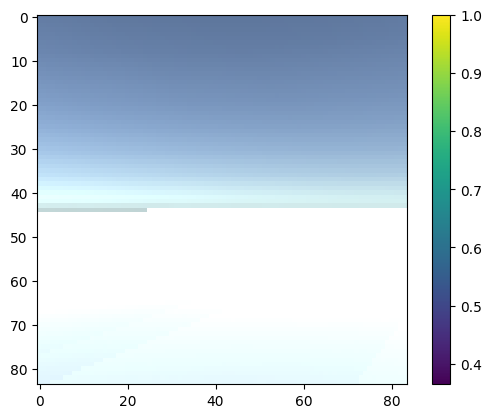

In [9]:
plt.imshow(obs[0])
plt.colorbar()

In [10]:
obs[1].shape

(27,)

In [3]:
# check observations change
obs_arr = []
obs = env.reset()
for i in range(10):
    action = env.action_space.sample()
    # action = np.array([0, 0, 1, 0])
    # action = brain(obs)
    obs, reward, done, info = env.step(action)
    obs_arr.append(obs)
    if reward > 0:
        print(obs[0].shape, reward, done, info)
    if done:
        obs = env.reset()

GraphicsDeviceType is Null. This will likely crash when trying to render.
GraphicsDeviceType is Null. This will likely crash when trying to render.
(84, 84, 3) 1.1505408 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x121fe7df0>}
GraphicsDeviceType is Null. This will likely crash when trying to render.
(84, 84, 3) 1.140325 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x121fe7e80>}
GraphicsDeviceType is Null. This will likely crash when trying to render.
(84, 84, 3) 1.1239362 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x121fe7e50>}
GraphicsDeviceType is Null. This will likely crash when trying to render.
(84, 84, 3) 1.1016164 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x121fe7eb0>}
GraphicsDeviceType is Null. This will likely crash when trying to render.
(84, 84, 3) 1.0793803 False {'step': <mlagents_envs.base_env.DecisionSteps object at 0x121faa550>}
GraphicsDeviceType is Null. This will likely crash when trying

In [4]:
obs_arr[0][1]

array([ 8.8595375e-03,  5.0000001e-02, -5.8629405e-02,  9.9112111e-01,
       -1.0584489e-09,  1.3296236e-01, -1.3296236e-01, -1.5850350e-08,
        9.9112111e-01,  3.5600029e-02, -4.1108676e-09,  2.0940699e-02,
       -9.0412065e-08,  7.5843126e-01,  1.6543612e-24, -1.1065733e-01,
        2.5729397e-03,  2.0704078e-02,  5.0304368e-02,  2.1350687e+00,
       -2.0997203e-03,  9.1961391e-02, -1.3817479e-01, -7.6370746e-02,
       -2.7734907e+00, -5.9325943e+00, -3.1242418e-01], dtype=float32)

In [5]:
obs_arr[9][1]

array([ 5.90065233e-02,  5.00000007e-02,  5.25901429e-02, -6.11669607e-02,
       -1.26500964e-07,  9.98127520e-01, -9.98127520e-01, -1.18986087e-07,
       -6.11669607e-02,  1.00686466e-02,  1.92547889e-09,  4.78210067e-03,
       -2.70674807e-08,  2.27058455e-01,  0.00000000e+00, -1.88312456e-02,
        6.88034925e-04, -1.82738446e-03,  1.13409925e-02,  2.84616441e-01,
       -8.22296459e-03, -3.50465998e-02,  2.82928091e-03, -3.12246624e-02,
        2.77372032e-01,  7.22533464e-01, -8.46187249e-02], dtype=float32)